In [2]:
# install main library YFinance
!pip install yfinance

In [3]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import datetime as dt
import time
from datetime import date


# Q1: Real GDP

In [40]:
end = date.today()

start = date(year=2022, month=1, day=1)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2022-01-01 to 2024-04-22 


In [41]:
# Real Gross Domestic Product (https://fred.stlouisfed.org/series/GDPC1), Billions of Chained 2012 Dollars, QUARTERLY
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start, end=end)

In [42]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,NaN,NaN
2023-01-01,22112.329,0.017179,0.017179
2023-04-01,22225.350,0.023825,0.023825
2023-07-01,22490.692,0.029269,0.029269
2023-10-01,22679.255,0.031345,0.031345


In [43]:
gdpc1_2023 = gdpc1.loc[['2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01']]
gdpc1_2023['gdpc1_us_yoy'].mean()

0.02540443392867625

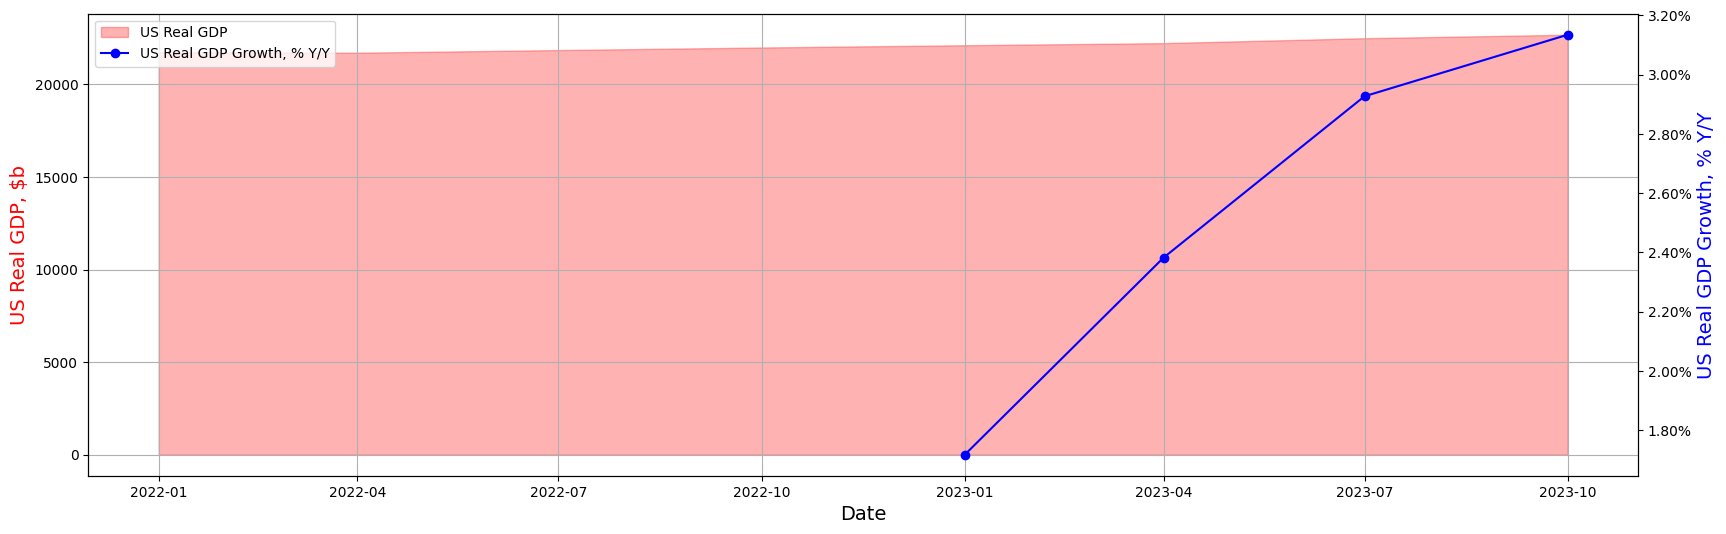

In [44]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US real GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Real GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US Real GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Real GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Real GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Q2: Inverse "Treasury Yield"**bold text**

In [52]:
start = date(year=2000, month=1, day=1)
end = date.today()
start, end

(datetime.date(2000, 1, 1), datetime.date(2024, 4, 22))

In [56]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [54]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [61]:
dgs_joined = dgs10.join(dgs2, on="DATE")
dgs_diff = dgs_joined.DGS10 - dgs_joined.DGS2
dgs_diff.min()

-1.0800000000000005

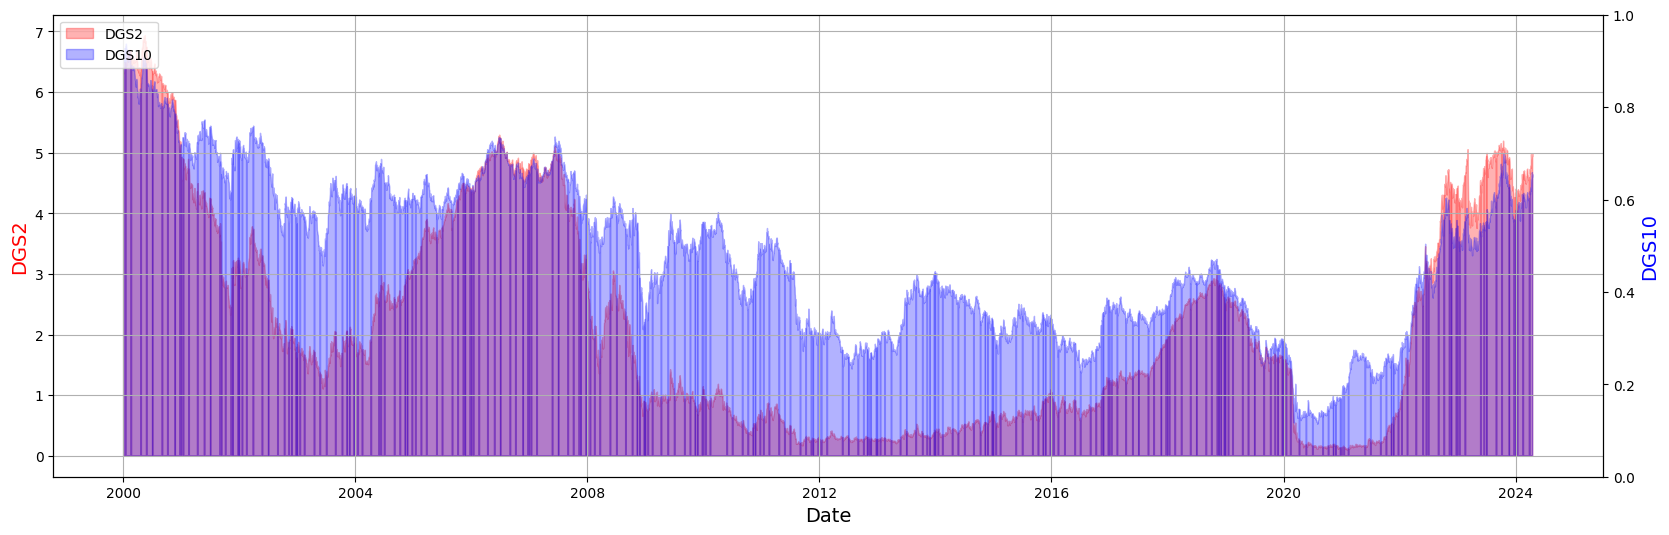

In [48]:
# Visuals DGS2, DGS10

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under market yield on US Treaury yield (2 year)
ax.fill_between(dgs2.index, dgs2.DGS2, color="red", alpha=0.3, label="DGS2")

# Creating a secondary y-axis for market yield on US Treasury (10 year)
ax2 = ax.twinx()
ax.fill_between(dgs10.index, dgs10.DGS10, color="blue", alpha=0.3, label="DGS10")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("DGS2", color="red", fontsize=14)
ax2.set_ylabel("DGS10", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Q3: Which index is better

In [62]:
start = date(year=2019, month=4, day=9)
end = date(year=2024, month=4, day=9)
start, end

(datetime.date(2019, 4, 9), datetime.date(2024, 4, 9))

In [71]:
sp500 = yf.download(tickers = "^GSPC", interval = "1d", start=start, end=end)
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000
...,...,...,...,...,...,...
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000


In [83]:
sp500.axes

[DatetimeIndex(['2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
                '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
                '2019-04-22', '2019-04-23',
                ...
                '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28',
                '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
                '2024-04-05', '2024-04-08'],
               dtype='datetime64[ns]', name='Date', length=1258, freq=None),
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')]

In [72]:
mxx = yf.download(tickers = "^MXX", interval = "1d", start=start, end=end)
mxx

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100
...,...,...,...,...,...,...
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700


In [86]:
growth_5y_sp500 = sp500.Close / sp500.Close.loc['2019-04-09'] - 1
growth_5y_mxx = mxx.Close / mxx.Close.loc['2019-04-09'] - 1
growth_5y_sp500, growth_5y_mxx

(Date
 2019-04-09    0.000000
 2019-04-10    0.003478
 2019-04-11    0.003516
 2019-04-12    0.010149
 2019-04-15    0.009513
                 ...   
 2024-04-02    0.808703
 2024-04-03    0.810677
 2024-04-04    0.788343
 2024-04-05    0.808193
 2024-04-08    0.807515
 Name: Close, Length: 1258, dtype: float64,
 Date
 2019-04-09    0.000000
 2019-04-10   -0.005371
 2019-04-11   -0.012659
 2019-04-12   -0.010311
 2019-04-15   -0.011646
                 ...   
 2024-04-02    0.275299
 2024-04-03    0.273562
 2024-04-04    0.281964
 2024-04-05    0.286608
 2024-04-08    0.284338
 Name: Close, Length: 1258, dtype: float64)

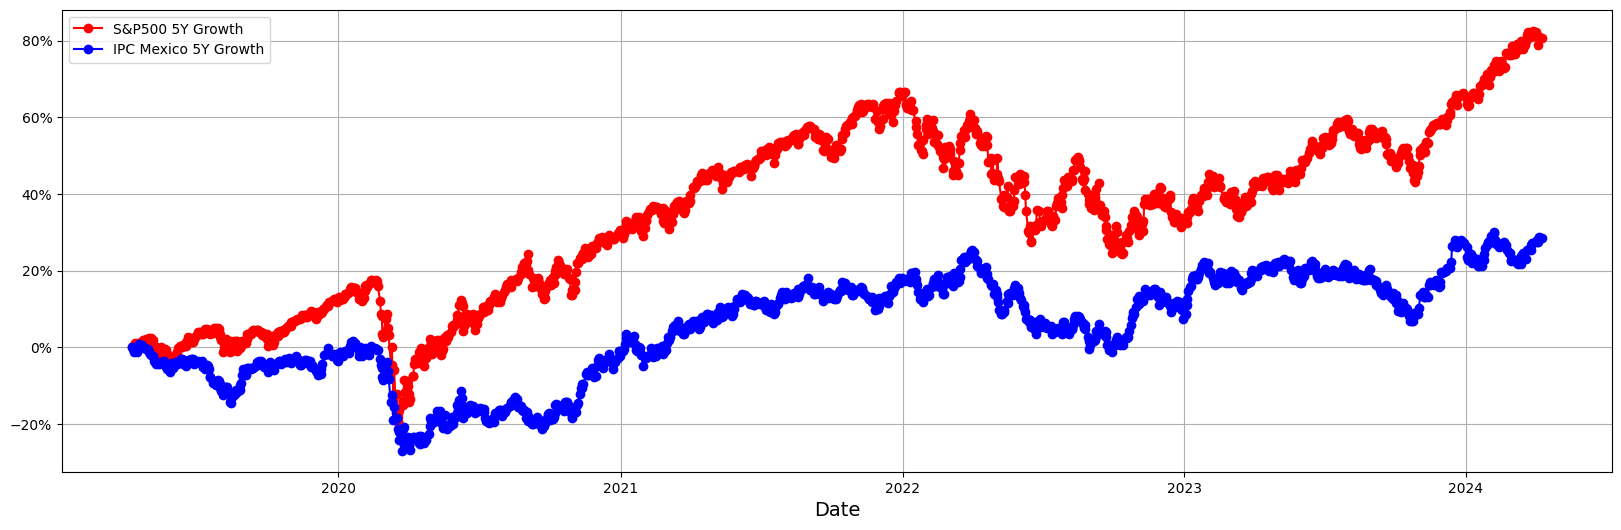

In [91]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US real GDP curve
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(growth_5y_sp500, color="red", marker="o", label="S&P500 5Y Growth")
ax.plot(growth_5y_mxx, color="blue", marker="o", label="IPC Mexico 5Y Growth")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

# Q4: 52-weeks range ratio (2023) for the selected stocks

In [92]:
start = date(year=2023, month=1, day=1)
end = date(year=2023, month=12, day=31)

In [144]:
saudi_oil_daily = yf.download(tickers = "2222.SR", interval="1d", start=start, end=end)
brkb_daily = yf.download(tickers = "BRK-B", interval="1d", start=start, end=end)
aapl_daily = yf.download(tickers = "AAPL", interval="1d", start=start, end=end)
msft_daily = yf.download(tickers = "MSFT", interval="1d", start=start, end=end)
goog_daily = yf.download(tickers = "GOOG", interval="1d", start=start, end=end)
jpm_daily = yf.download(tickers = "JPM", interval="1d", start=start, end=end)
dailies = [saudi_oil_daily, brkb_daily, aapl_daily, msft_daily, goog_daily, jpm_daily]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [150]:
saudi_oil_daily.loc[saudi_oil_daily.index.max()]["Adj Close"], saudi_oil_daily

(32.87778854370117,
                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2023-01-01  29.227272  29.454544  29.181818  29.454544  28.475794   1569087
 2023-01-02  29.545454  29.545454  29.227272  29.227272  28.256073   4693364
 2023-01-03  29.227272  29.227272  29.227272  29.227272  28.256073         0
 2023-01-04  29.181818  29.227272  28.681818  28.818180  27.860577   4618455
 2023-01-05  28.818180  28.818180  28.363636  28.681818  27.728743   4797670
 ...               ...        ...        ...        ...        ...       ...
 2023-12-24  32.950001  33.099998  32.849998  33.000000  32.828049  12165552
 2023-12-25  33.000000  33.099998  32.849998  33.099998  32.927525  15869070
 2023-12-26  33.049999  33.099998  32.900002  33.049999  32.877789  14598967
 2023-12-27  33.099998  33.250000  33.000000  33.150002  32.977268  14815683
 2023-12-28  33.150002  33.250000  32.950001  33.049999 

In [106]:
# range ratio: (stock ac max - stock ac min) / max ac
max_adj_close = max([d["Adj Close"].max() for d in dailies])
for idx in range(len(dailies)):
  df = dailies[idx]
  adj_close_max = df["Adj Close"].max()
  adj_close_min = df["Adj Close"].min()
  df_rr = (adj_close_max - adj_close_min) / max_adj_close
  print(idx, df_rr)

0 0.019411036658694415
1 0.20149551412072716
2 0.19291128335988486
3 0.4242066515530231
4 0.14673022657602955
5 0.12444577115572557


# Q5: Dividend Yield

In [151]:
saudi_tick = yf.Ticker("2222.SR")
saudi_hist = saudi_tick.history(start=start, end=end, interval="1d")
saudi_oil_daily.loc["2023-12-18"]
saudi_div_yield = saudi_tick.dividends.sum() / saudi_oil_daily.loc[saudi_oil_daily.index.max()]["Adj Close"]
saudi_tick.dividends, saudi_tick.dividends.sum(), saudi_div_yield

(Date
 2023-03-15 00:00:00+03:00    0.302364
 2023-05-17 00:00:00+03:00    0.302400
 2023-09-11 00:00:00+03:00    0.153000
 2023-11-15 00:00:00+03:00    0.153000
 Name: Dividends, dtype: float64,
 0.9107640000000001,
 0.027701498195032558)

In [152]:
brkb_tick = yf.Ticker("BRK-B")
brkb_tick.history(start=start, end=end, interval="1d")
brkb_tick.dividends, brkb_tick.dividends.sum()
brkb_div_yield = brkb_tick.dividends.sum() / brkb_daily.loc[brkb_daily.index.max()]["Adj Close"]
brkb_tick.dividends, brkb_tick.dividends.sum(), brkb_div_yield

(Series([], Name: Dividends, dtype: float64), 0.0, 0.0)

In [153]:
aapl_tick = yf.Ticker("AAPL")
aapl_tick.history(start=start, end=end, interval="1d")
aapl_tick.dividends, aapl_tick.dividends.sum()
aapl_div_yield = aapl_tick.dividends.sum() / aapl_daily.loc[aapl_daily.index.max()]["Adj Close"]
aapl_tick.dividends, aapl_tick.dividends.sum(), aapl_div_yield

(Date
 2023-02-10 00:00:00-05:00    0.23
 2023-05-12 00:00:00-04:00    0.24
 2023-08-11 00:00:00-04:00    0.24
 2023-11-10 00:00:00-05:00    0.24
 Name: Dividends, dtype: float64,
 0.95,
 0.004940592304162832)

In [154]:
msft_tick = yf.Ticker("MSFT")
msft_tick.history(start=start, end=end, interval="1d")
msft_div_yield = msft_tick.dividends.sum() / msft_daily.loc[msft_daily.index.max()]["Adj Close"]
msft_tick.dividends, msft_tick.dividends.sum(), msft_div_yield

(Date
 2023-02-15 00:00:00-05:00    0.68
 2023-05-17 00:00:00-04:00    0.68
 2023-08-16 00:00:00-04:00    0.68
 2023-11-15 00:00:00-05:00    0.75
 Name: Dividends, dtype: float64,
 2.79,
 0.007433143940964608)

In [155]:
goog_tick = yf.Ticker("GOOG")
goog_tick.history(start=start, end=end, interval="1d")
goog_div_yield = goog_tick.dividends.sum() / goog_daily.loc[goog_daily.index.max()]["Adj Close"]
goog_tick.dividends, goog_tick.dividends.sum(), goog_div_yield

(Series([], Name: Dividends, dtype: float64), 0.0, 0.0)

In [156]:
jpm_tick = yf.Ticker("JPM")
jpm_tick.history(start=start, end=end, interval="1d")
jpm_div_yield = jpm_tick.dividends.sum() / jpm_daily.loc[jpm_daily.index.max()]["Adj Close"]
jpm_tick.dividends, jpm_tick.dividends.sum(), jpm_div_yield

(Date
 2023-01-05 00:00:00-05:00    1.00
 2023-04-05 00:00:00-04:00    1.00
 2023-07-05 00:00:00-04:00    1.00
 2023-10-05 00:00:00-04:00    1.05
 Name: Dividends, dtype: float64,
 4.05,
 0.02409608190645897)

# Q6: Investigate new metrics

I lean more toward value investing. Though I haven't chosen my project yet, I think I would want to build something to help with investigating a stock's value.

* P/E Ratio - valuation ratio
* EPS - how much profit per share

In [162]:
msft_tick.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [157]:
msft_tick.income_stmt

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Tax Effect Of Unusual Items,-2850000.0,43420000.0,180160797.164637,4760000.0
Tax Rate For Calcs,0.19,0.13,0.138266,0.17
Normalized EBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0


In [158]:
msft_tick.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-01-28 16:00:00-05:00,NaN,NaN,NaN
2024-10-22 06:00:00-04:00,NaN,NaN,NaN
2024-07-23 06:00:00-04:00,NaN,NaN,NaN
2024-04-25 17:00:00-04:00,2.82,NaN,NaN
2024-04-25 16:00:00-04:00,2.82,NaN,NaN
2024-01-30 16:00:00-05:00,2.78,2.93,0.0534
2023-10-24 16:00:00-04:00,2.65,2.99,0.1270
2023-07-25 16:00:00-04:00,2.55,2.69,0.0549
2023-04-25 16:00:00-04:00,2.23,2.45,0.0981


In [161]:
msft_tick.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
Other Short Term Investments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


# Q7: Time-driven strategy description around earnings releases


Looking at the estimated EPS, pick stocks that have promising EPS and had good growth QoQ (last 4 quarters).